In [8]:
from sklearn.datasets import fetch_openml

In [9]:
mnist = fetch_openml('mnist_784', as_frame = False)
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47

In [10]:
X, y = mnist.data, mnist.target 
X[0].shape # (784,), 28 * 28 pixles 

(784,)

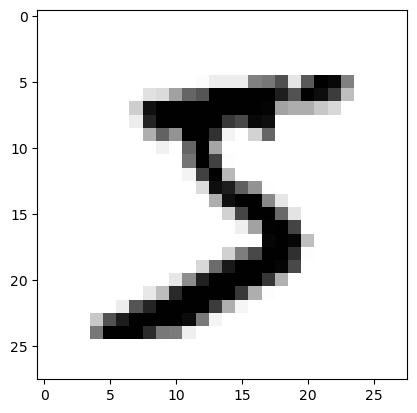

5


In [11]:
import matplotlib.pyplot as plt 

def plot_digit(image_data):
    image_reshaped = image_data.reshape(28, 28)
    plt.imshow(image_reshaped, cmap='binary')
    # plt.axis("off")
plot_digit(X[0])
plt.show()
print(y[0])

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
y_train_5, y_test_5 = (y_train == "5"), (y_test == "5")

In [14]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [15]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [16]:
sgd_clf.predict([X[0]])

array([ True])

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [18]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier() # classifies each instance to the most frequent class. in this case, the non-5 class
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [19]:
cross_val_score(dummy_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")


array([0.90965, 0.90965, 0.90965])

In [20]:
import numpy as np 
unique, counts = np.unique(y_train, return_counts = True)
print(unique)
print(counts)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [21]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [22]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [23]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_train_5, y_train_pred)
cm 

array([[53892,   687],
       [ 1891,  3530]])

In [24]:
# precision -- accuracy of positive predictions 
# TP / (TP + FP)
# recall -- ratio of positive instances *correctly* detected by the classifier
# TP / (TP + FN)
# [T/F][P/N] > [My prediction][My Class]

In [25]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)
# when the classifier outputs 5, it's only true 83% of the time 

0.8370879772350012

In [26]:
recall_score(y_train_5, y_train_pred)
# the classifier is able to detect 65% of 5s

0.6511713705958311

In [27]:
# f1 score gets high, when both precision and recall are high 
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [28]:
# makes a threshold at each data point 
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3,method = "decision_function" )
y_scores 


array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [29]:
len(y_scores)

60000

In [30]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [31]:
len(thresholds)

60000

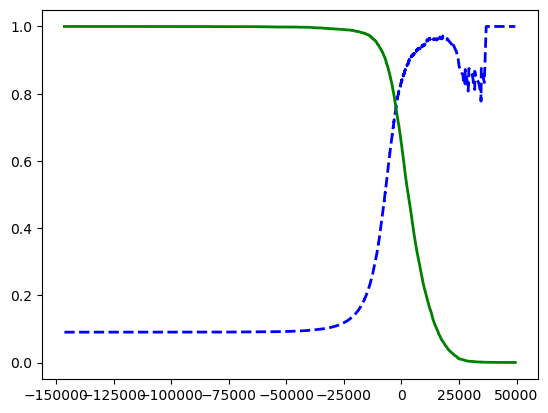

In [32]:
plt.plot(thresholds, precisions[:-1], "b--", label = "precision", linewidth = 2)
plt.plot(thresholds, recalls[:-1], "g-", label = "recall", linewidth = 2)
plt.show()


In [33]:
# let's aim for at least 90% precision (at some recall risk)
idx_90_precision = (precisions >0.9).argmax()
threshold_90 = thresholds[idx_90_precision]
threshold_90

3370.019499144183

In [34]:
y_train_pred_90 = (y_scores >= threshold_90)

In [35]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [36]:
recall_score(y_train_5, y_train_pred_90)


0.4799852425751706

In [37]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [39]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [40]:
y_probabs_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [41]:
y_probabs_forest[:2]

array([[0.11, 0.89],
       [0.98, 0.02]])

In [42]:
y_scores_forest = y_probabs_forest[:, 1]
precessions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)


In [43]:
y_train_pred_forest = y_probabs_forest[:, 1] >= 0.5 # positive labels as final answers
f1_score(y_train_5, y_train_pred_forest) # y vs y^hat

0.9270445185330457

In [44]:
roc_auc_score(y_train_5, y_scores_forest) # train vs scores (similar to thresholds in case of sgd)

0.9983296721818179

In [45]:
y_probabs_forest

array([[0.11, 0.89],
       [0.98, 0.02],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.93, 0.07]])

In [46]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [47]:
precision_score(y_train_5,y_train_pred_forest )

0.9895331798199707

In [48]:
recall_score(y_train_5,y_train_pred_forest )

0.8719793396052389

- multicalss classification

In [49]:
from sklearn.svm import SVC

svc_clf = SVC(random_state=42)
svc_clf.fit(X_train[:2000], y_train[:2000])

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [50]:
svc_clf.predict([X_train[0]])

array(['5'], dtype=object)

In [51]:
some_digit = X[0]
some_digit_score = svc_clf.decision_function([some_digit])
some_digit_score.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [52]:
class_id = some_digit_score.argmax()
class_id

5

In [53]:
svc_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [54]:
svc_clf.classes_[class_id]

'5'

In [55]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype("int8")%2 == 1)
y_mutlilabel = np.c_[y_train_large, y_train_odd]
y_mutlilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [56]:
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train, y_mutlilabel)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [57]:
kn_clf.predict([X_train[0]])

array([[False,  True]])

In [58]:
y_train_knn_pred = cross_val_predict(kn_clf, X_train, y_mutlilabel, cv = 3)
f1_score(y_mutlilabel, y_train_knn_pred, average='macro')

0.9764102655606048

In [59]:
from sklearn.multioutput import ClassifierChain
from sklearn.svm import SVC

chain_clf = ClassifierChain(SVC(), cv = 3, random_state=42)
chain_clf.fit(X_train[:2000], y_mutlilabel[:2000])


,estimator,SVC()
,order,None
,cv,3
,chain_method,'predict'
,random_state,42
,verbose,False
,base_estimator,'deprecated'
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [60]:
chain_clf.predict([X_train[0]])

array([[0., 1.]])

In [71]:
np.random.seed(42)
noise = np.random.randint(0, 255, (len(X_train), 784))
X_train_mod = X_train + noise 
noise = np.random.randint(0, 255, (len(X_test), 784))
X_test_mod = X_test + noise 
y_train_mod = X_train
y_test_mod = X_test 


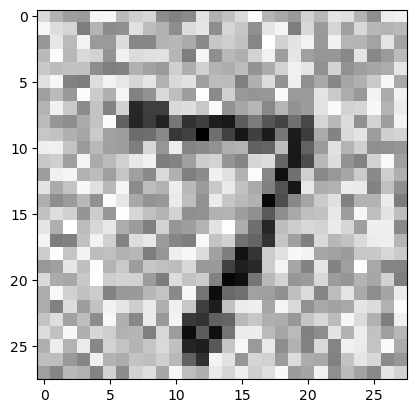

In [72]:
plot_digit(X_test_mod[0])


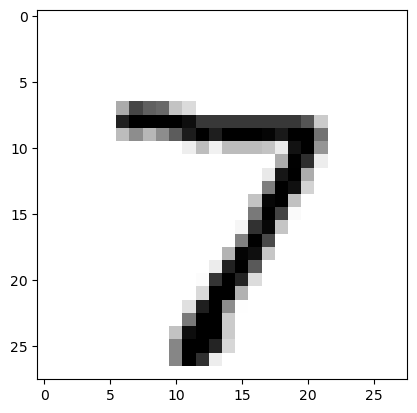

In [73]:
plot_digit(y_test_mod[0])


In [74]:
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train_mod, y_train_mod)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


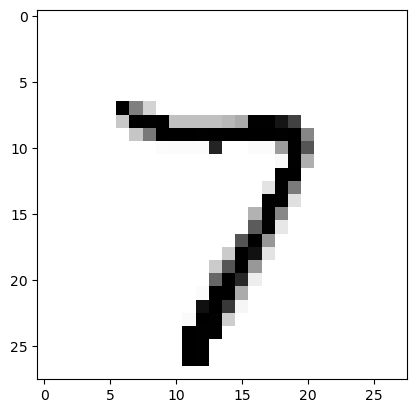

In [75]:
plot_digit(kn_clf.predict([X_test_mod[0]]))